In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')



import numpy as np
import pandas as pd

#Read the CSV file
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Inspect the various aspects of the housing dataframe
df.shape
df.info()
df.describe()

# The rows for which the sum of Null is less than five are retained

df = df[df.isnull().sum(axis=1) <= 5]
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#list(df)
df['CarName']= df['CarName'].str.split(' ',1, expand = True)
df['CarName']= df['CarName'].str.split('-',1, expand = True)

df.CarName.unique()


array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [5]:
#Need to correct the missplet variables

df['CarName'] = df['CarName'].str.replace('nissan' ,'Nissan')
df['CarName'] = df['CarName'].str.replace('porcshce' ,'porsche')
df['CarName'] = df['CarName'].str.replace('toyouta' ,'toyota')
df['CarName'] = df['CarName'].str.replace('vokswagen' ,'volkswagen')
df['CarName'] = df['CarName'].str.replace('vw' ,'volkswagen')

df.CarName.unique()

#replace number of doors two and four as 2doors and 4doors

df['doornumber']=df['doornumber'].str.replace('two','2door')
df['doornumber']=df['doornumber'].str.replace('four','4door')

#replace cylindernumber two,three,four,five,six,eight twelve as 2cyl ,3cyl, 4cyl ,5cyl,6cyl,8cyl,12cyl.

df['cylindernumber']=df['cylindernumber'].str.replace('two','2cyl')
df['cylindernumber']=df['cylindernumber'].str.replace('four','4cyl')
df['cylindernumber']=df['cylindernumber'].str.replace('three','3cyl')
df['cylindernumber']=df['cylindernumber'].str.replace('five','5cyl')
df['cylindernumber']=df['cylindernumber'].str.replace('six','6cyl')
df['cylindernumber']=df['cylindernumber'].str.replace('eight','8cyl')
df['cylindernumber']=df['cylindernumber'].str.replace('twelve','12cyl')



In [6]:
df.doornumber.unique()
df.cylindernumber.unique()

array(['4cyl', '6cyl', '5cyl', '3cyl', '12cyl', '2cyl', '8cyl'],
      dtype=object)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

<Figure size 4000x4000 with 272 Axes>

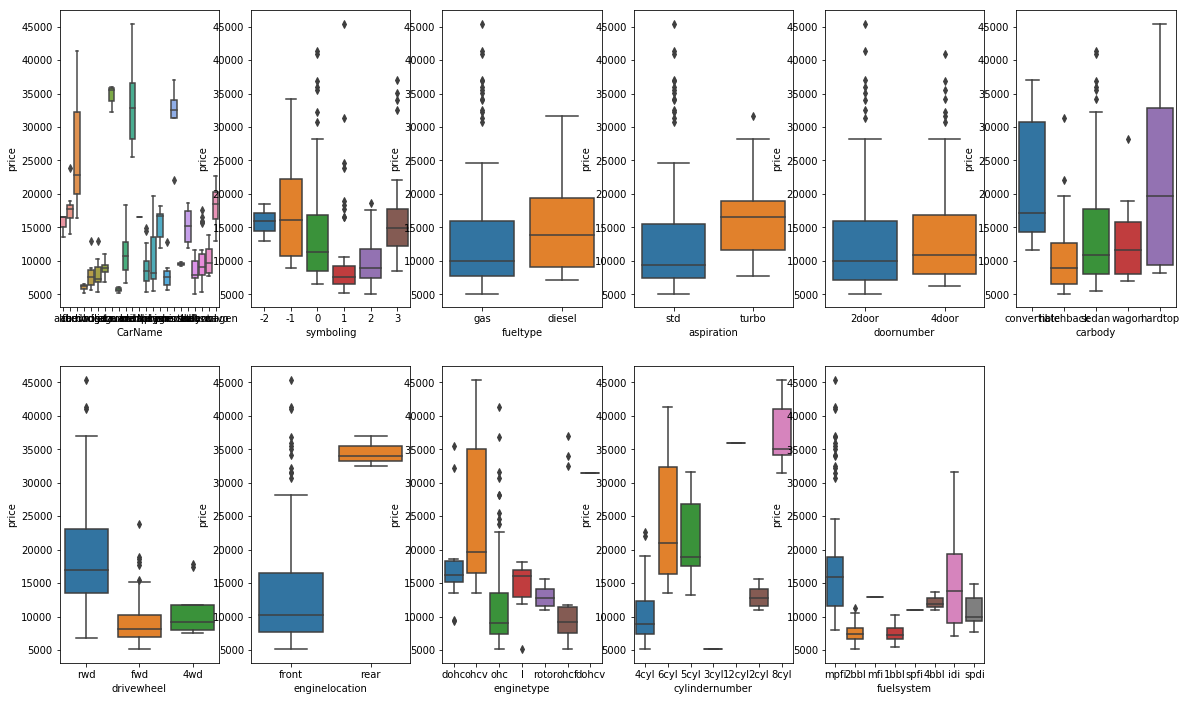

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,6,1)
sns.boxplot(x = 'CarName', y = 'price', data = df)
plt.subplot(2,6,2)
sns.boxplot(x = 'symboling', y = 'price', data = df)

plt.subplot(2,6,3)

sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(2,6,4)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(2,6,5)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(2,6,6)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(2,6,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(2,6,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(2,6,9)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(2,6,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(2,6,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)



plt.show()

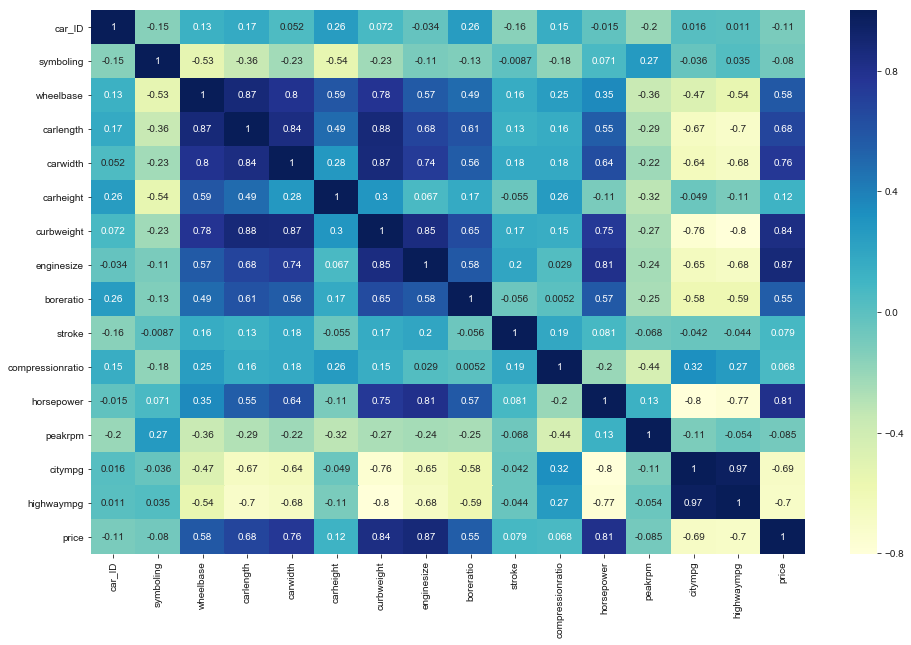

In [9]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
sns.set(font_scale=1.6)

plt.show()

In [10]:
#Convert the categorical varibales to numeric varibales by getdummies
list(df)
status1 = pd.get_dummies(df['CarName'])
df = pd.concat([df, status1], axis = 1)
df.drop(['CarName'], axis = 1, inplace = True)

status2 = pd.get_dummies(df['symboling'])
df = pd.concat([df, status2], axis = 1)
df.drop(['symboling'], axis = 1, inplace = True)

status3 = pd.get_dummies(df['fueltype'])
df = pd.concat([df, status3], axis = 1)
df.drop(['fueltype'], axis = 1, inplace = True)

status4 = pd.get_dummies(df['aspiration'])
df = pd.concat([df, status4], axis = 1)
df.drop(['aspiration'], axis = 1, inplace = True)

status5 = pd.get_dummies(df['doornumber'])
df = pd.concat([df, status5], axis = 1)
df.drop(['doornumber'], axis = 1, inplace = True)

status6 = pd.get_dummies(df['carbody'])
df = pd.concat([df, status6], axis = 1)
df.drop(['carbody'], axis = 1, inplace = True)

status7 = pd.get_dummies(df['drivewheel'])
df = pd.concat([df, status7], axis = 1)
df.drop(['drivewheel'], axis = 1, inplace = True)

status8 = pd.get_dummies(df['enginelocation'])
df = pd.concat([df, status8], axis = 1)
df.drop(['enginelocation'], axis = 1, inplace = True)

status9 = pd.get_dummies(df['enginetype'])
df = pd.concat([df, status9], axis = 1)
df.drop(['enginetype'], axis = 1, inplace = True)

status10 = pd.get_dummies(df['cylindernumber'])
df = pd.concat([df, status10], axis = 1)
df.drop(['cylindernumber'], axis = 1, inplace = True)

status10 = pd.get_dummies(df['fuelsystem'])
df = pd.concat([df, status10], axis = 1)
df.drop(['fuelsystem'], axis = 1, inplace = True)

#df = pd.concat([df, status10], axis = 1)

list(df)


['car_ID',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'Nissan',
 'alfa',
 'audi',
 'bmw',
 'buick',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'maxda',
 'mazda',
 'mercury',
 'mitsubishi',
 'peugeot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo',
 -2,
 -1,
 0,
 1,
 2,
 3,
 'diesel',
 'gas',
 'std',
 'turbo',
 '2door',
 '4door',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'front',
 'rear',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 '12cyl',
 '2cyl',
 '3cyl',
 '4cyl',
 '5cyl',
 '6cyl',
 '8cyl',
 '1bbl',
 '2bbl',
 '4bbl',
 'idi',
 'mfi',
 'mpfi',
 'spdi',
 'spfi']

In [67]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor



# First extract the target variable which is our House prices
Y = df.price.values
# Drop price from the house dataframe and create a matrix out of the house data
df1 = df.drop(['price'], axis=1)
X = df1.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = df1.columns



In [68]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))


In [23]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')


C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [24]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)


Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 fe

In [25]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)


C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [26]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50building tree 5 of 50

building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50building tree 10 of 50
building tree 11 of 50

building tree 12 of 50building tree 13 of 50

building tree 14 of 50
building tree 15 of 50building tree 16 of 50

building tree 17 of 50
building tree 18 of 50building tree 19 of 50
building tree 20 of 50
building tree 21 of 50building tree 22 of 50building tree 23 of 50



building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50building tree 29 of 50building tree 30 of 50


building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50building tree 36 of 50

building tree 37 of 50building tree 38 of 50
building tree 39 of 50
building tree 40 of 50

building tree 41 of 50building tree 42 of 50
building tree 43 of 50

building tree 44 of 

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [27]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str,[ranks[method][name] for method in methods]))))


	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
car_ID	0.0	0.0	0.03	0.11	0.01	0.49	0.11
wheelbase	0.01	0.0	0.01	0.09	0.05	0.7	0.14
carlength	0.01	0.0	0.01	0.07	0.03	0.44	0.09
carwidth	0.04	0.0	0.02	0.14	0.23	0.99	0.24
carheight	0.01	0.0	0.01	0.01	0.1	0.45	0.1
curbweight	0.0	0.0	0.39	0.02	0.0	0.95	0.23
enginesize	0.01	0.0	1.0	0.1	0.05	0.99	0.36
boreratio	0.18	0.0	0.0	0.16	0.15	0.68	0.2
stroke	0.1	0.0	0.0	0.12	0.74	0.76	0.29
compressionratio	0.05	0.0	0.01	0.15	0.04	0.25	0.08
horsepower	0.0	0.0	0.03	0.06	0.01	0.79	0.15
peakrpm	0.0	0.0	0.01	0.0	0.0	0.82	0.14
citympg	0.0	0.0	0.01	0.05	0.04	0.22	0.05
highwaympg	0.01	0.0	0.05	0.04	0.08	0.35	0.09
Nissan	0.07	0.17	0.0	0.3	0.53	0.6	0.28
alfa	0.74	0.17	0.0	0.26	0.02	0.68	0.31
audi	0.76	0.17	0.0	0.36	0.07	0.78	0.36
bmw	1.0	0.17	0.01	0.41	1.0	1.0	0.6
buick	0.63	0.17	0.0	0.37	0.76	1.0	0.49
chevrolet	0.28	0.17	0.0	0.17	0.07	0.41	0.18
dodge	0.23	0.17	0.0	0.24	0.55	0.71	0.32
honda	0.35	0.17	0.0	0.35	0.2	0.25	0.22
isuzu	0.29	0.17	0.0	0.19	0.07	0.66	0.2

C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\bindh\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


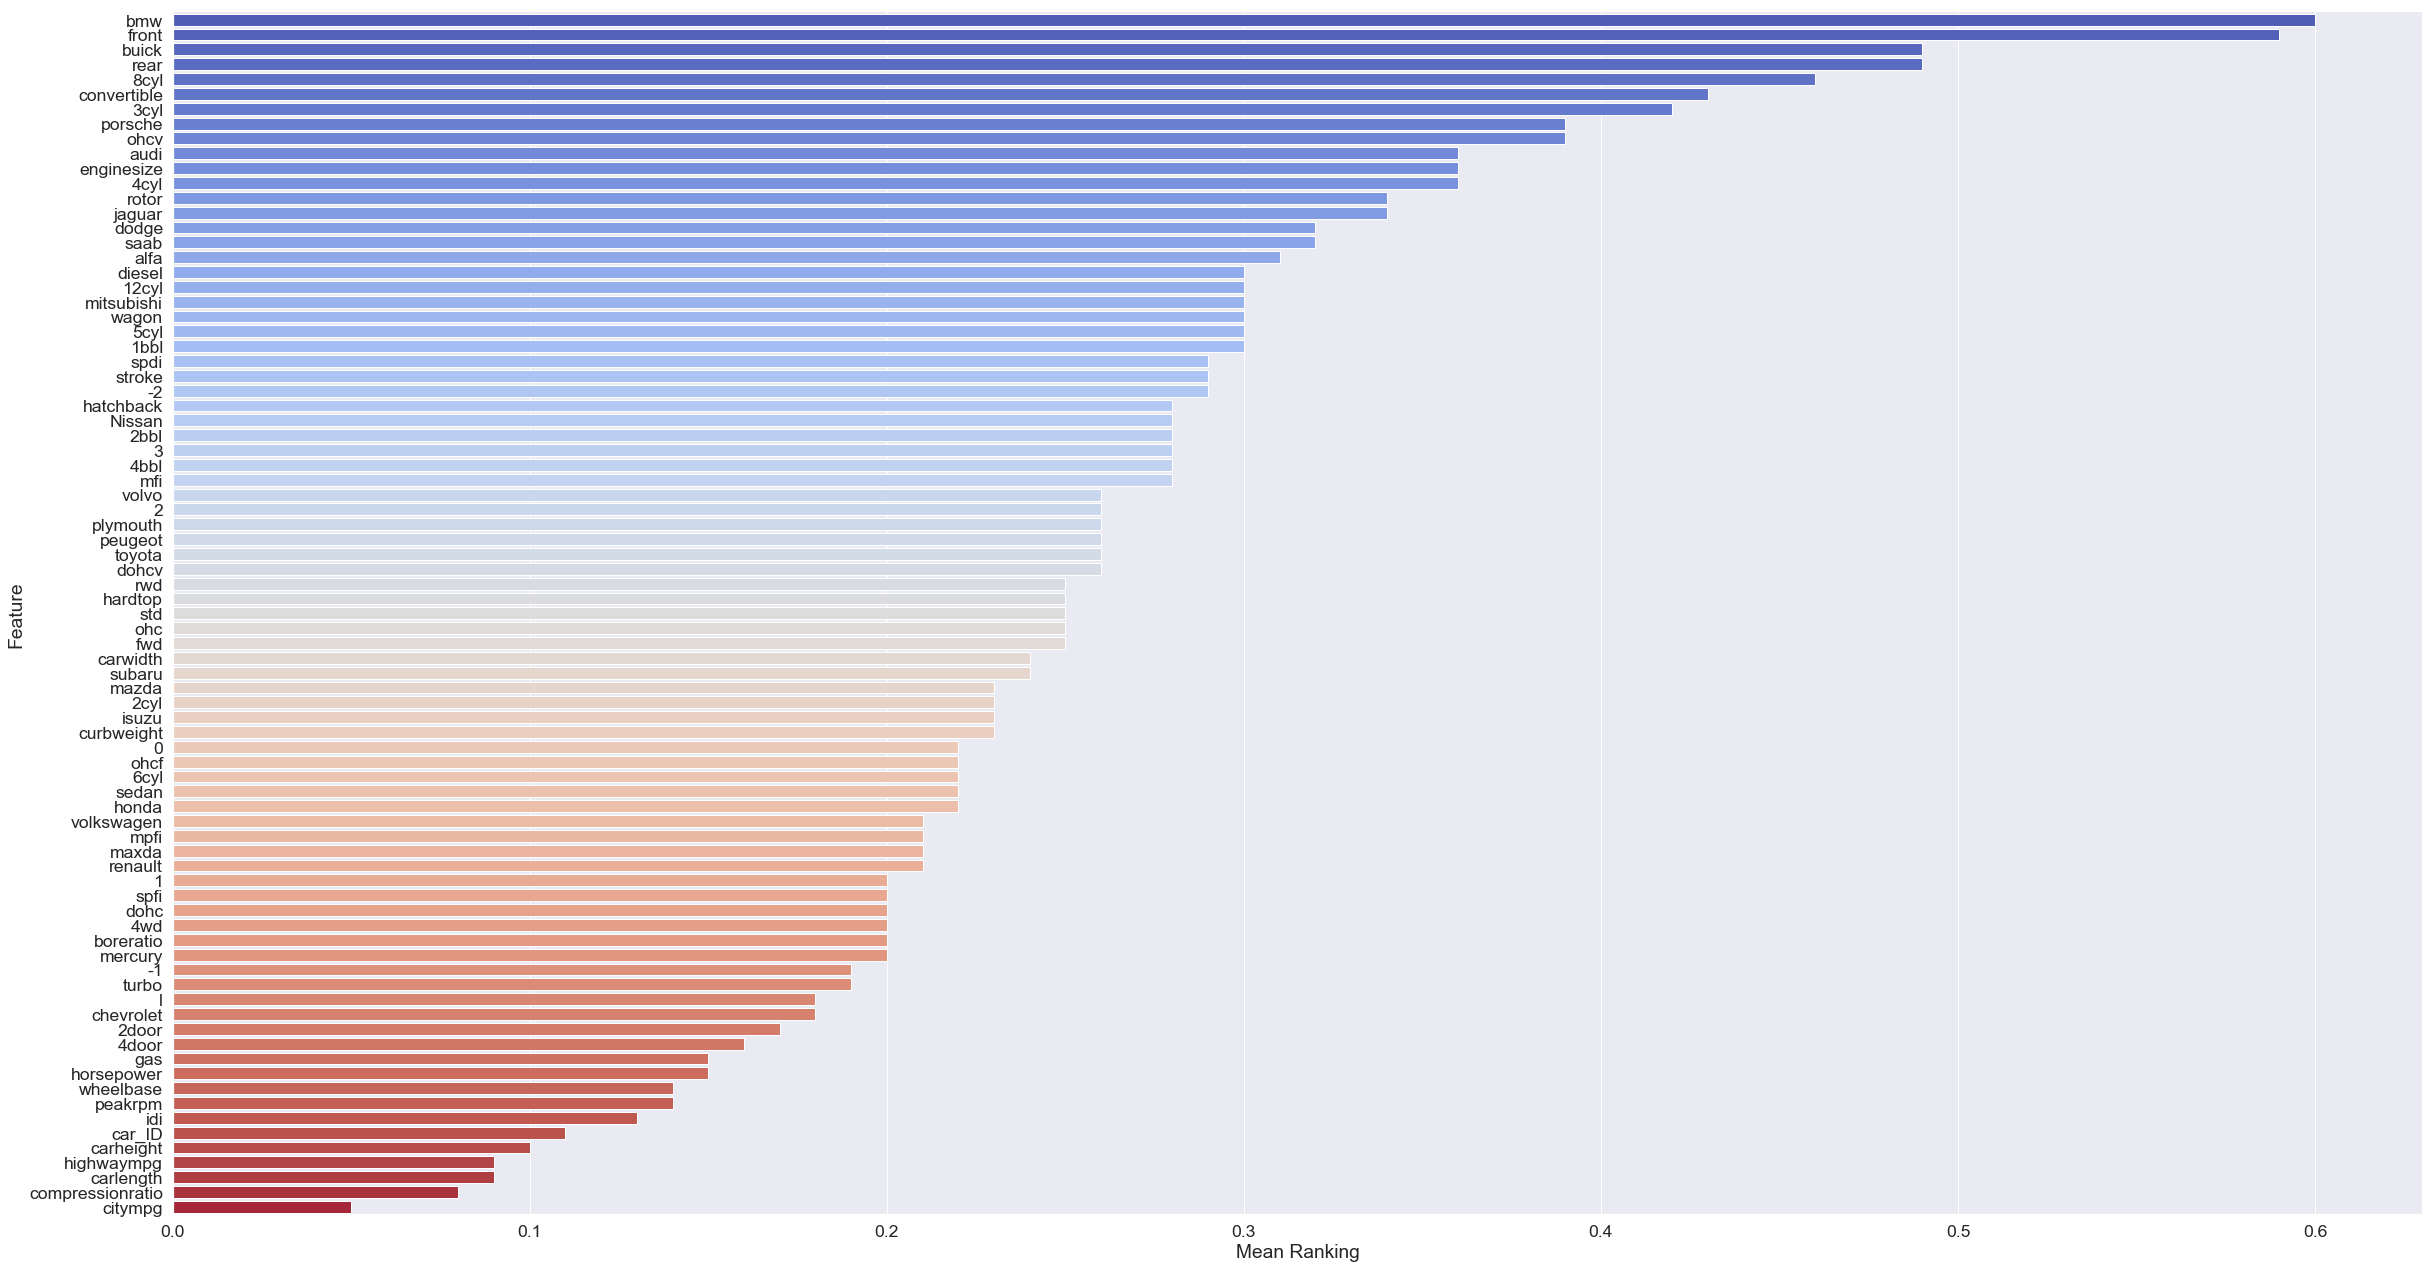

In [28]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=18, aspect=1.9, palette='coolwarm')


In [69]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [71]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize' , 'boreratio','stroke','compressionratio','horsepower','peakrpm',
'citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [72]:
df_train.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,6cyl,8cyl,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,123,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,126,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,167,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,2,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,200,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


In [73]:
#Take first 15 top ranking variables from RFE and 5 highly correlated variables form heat map

df_New = df[['bmw','front','buick','rear','8cyl','convertible','3cyl','porsche','ohcv','audi','enginesize','4cyl','rotor','jaguar','dodge', 'price','curbweight','carwidth','carheight','horsepower']]

In [74]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_New, train_size = 0.7, test_size = 0.3, random_state = 100)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [76]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = [ 'carwidth', 'carheight', 'curbweight', 'enginesize' ,'horsepower','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [77]:
df_train.head()

,bmw,front,buick,rear,8cyl,convertible,3cyl,porsche,ohcv,audi,enginesize,4cyl,rotor,jaguar,dodge,price,curbweight,carwidth,carheight,horsepower
122,0,1,0,0,0,0,0,0,0,0,0.139623,1,0,0,0,0.068818,0.272692,0.291667,0.265487,0.083333
125,0,1,0,0,0,0,0,1,0,0,0.339623,1,0,0,0,0.466890,0.500388,0.666667,0.212389,0.395833
166,0,1,0,0,0,0,0,0,0,0,0.139623,1,0,0,0,0.122110,0.314973,0.308333,0.424779,0.266667
1,0,1,0,0,0,1,0,0,0,0,0.260377,1,0,0,0,0.314446,0.411171,0.316667,0.088496,0.262500
199,0,1,0,0,0,0,0,0,0,0,0.260377,1,0,0,0,0.382131,0.647401,0.575000,0.858407,0.475000


In [78]:
df_train.describe()

,bmw,front,buick,rear,8cyl,convertible,3cyl,porsche,ohcv,audi,enginesize,4cyl,rotor,jaguar,dodge,price,curbweight,carwidth,carheight,horsepower
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.041958,0.993007,0.034965,0.006993,0.020979,0.027972,0.006993,0.020979,0.062937,0.034965,0.241351,0.741259,0.027972,0.020979,0.041958,0.219310,0.407878,0.461655,0.509004,0.227302
std,0.201198,0.083624,0.184337,0.083624,0.143818,0.165472,0.083624,0.143818,0.243703,0.184337,0.154619,0.439483,0.165472,0.143818,0.201198,0.215682,0.211269,0.184517,0.215378,0.165511
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.135849,0.000000,0.000000,0.000000,0.000000,0.067298,0.245539,0.304167,0.353982,0.091667
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184906,1.000000,0.000000,0.000000,0.000000,0.140343,0.355702,0.425000,0.522124,0.191667
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301887,1.000000,0.000000,0.000000,0.000000,0.313479,0.559542,0.550000,0.668142,0.283333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


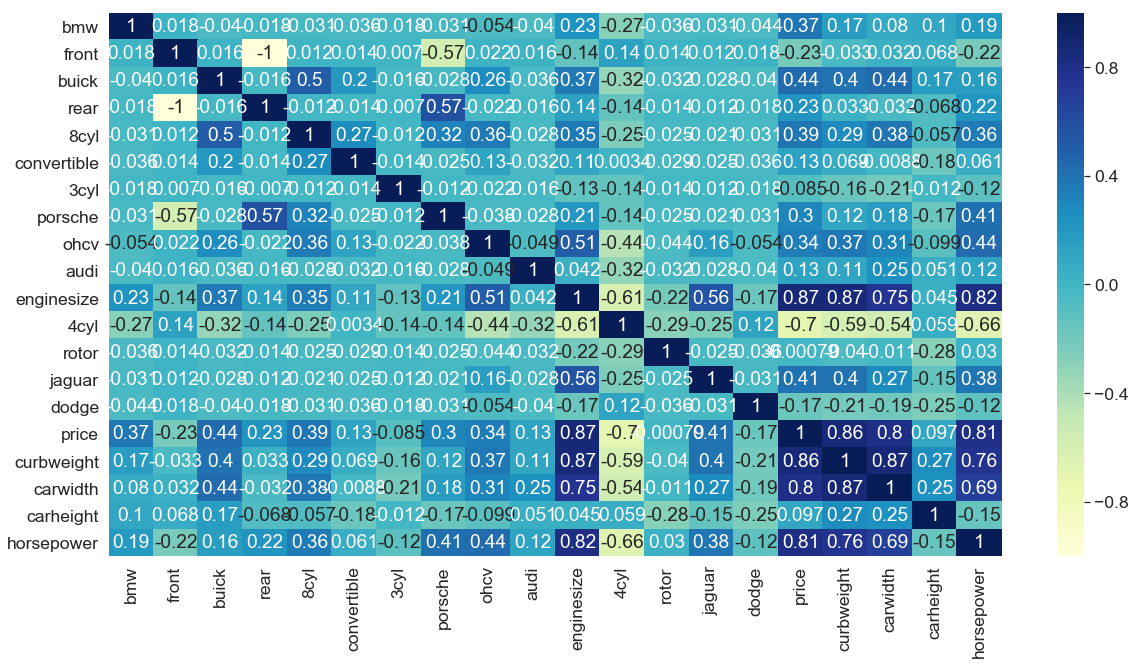

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [79]:
y_train = df_train.pop('price')
X_train = df_train




In [80]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const          0.054139
bmw            0.302579
front         -0.164257
buick          0.187398
rear           0.218396
8cyl           0.031888
convertible    0.115381
3cyl           0.111928
porsche        0.118525
ohcv          -0.004400
audi           0.039560
enginesize     0.047498
4cyl          -0.021871
rotor          0.039439
jaguar         0.243935
dodge          0.005262
curbweight     0.267311
carwidth       0.313749
carheight     -0.001882
horsepower     0.196311
dtype: float64

In [81]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           4.03e-66
Time:                        19:01:50   Log-Likelihood:                 216.51
No. Observations:                 143   AIC:                            -395.0
Df Residuals:                     124   BIC:                            -338.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0541      0.037      1.458      

In [52]:
#Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

#Maybe we could drop some?

#We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,front,64.23
10,enginesize,20.94
15,curbweight,12.65
18,horsepower,7.02
16,carwidth,6.96
11,4cyl,5.24
12,rotor,3.15
13,jaguar,2.81
7,porsche,2.60
17,carheight,2.53


In [84]:
#Dropping dodge with high p-value

X = X_train.drop('front', 1,)

In [85]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [86]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           4.03e-66
Time:                        19:03:02   Log-Likelihood:                 216.51
No. Observations:                 143   AIC:                            -395.0
Df Residuals:                     124   BIC:                            -338.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1101      0.038     -2.864      

In [88]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginesize,58.05
14,curbweight,54.00
15,carwidth,50.08
17,horsepower,19.07
16,carheight,13.53
10,4cyl,6.77
12,jaguar,2.71
6,porsche,2.65
1,buick,2.44
7,ohcv,2.29


In [89]:
#Enginesize has high vif and high p-value.Hence dropping it
X = X.drop('enginesize', 1)

In [90]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [91]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           3.95e-67
Time:                        19:03:58   Log-Likelihood:                 216.45
No. Observations:                 143   AIC:                            -396.9
Df Residuals:                     125   BIC:                            -343.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1044      0.034     -3.042      

In [92]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,curbweight,46.02
14,carwidth,43.46
16,horsepower,16.32
15,carheight,13.29
9,4cyl,6.72
6,porsche,2.64
1,buick,2.35
3,8cyl,2.18
7,ohcv,1.85
2,rear,1.82


In [98]:
X = X_train.drop('curbweight', 1,)

In [99]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [100]:
# Print the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           7.09e-65
Time:                        19:09:11   Log-Likelihood:                 210.46
No. Observations:                 143   AIC:                            -384.9
Df Residuals:                     125   BIC:                            -331.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0181      0.037      0.490      

In [101]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,front,57.67
10,enginesize,16.35
17,horsepower,6.23
15,carwidth,5.86
11,4cyl,5.22
12,rotor,2.82
13,jaguar,2.78
7,porsche,2.55
2,buick,2.35
3,rear,2.33


In [115]:
X = X_train.drop('front', 1)
X = X.drop('enginesize', 1)
X = X.drop("curbweight", 1)
X = X.drop('carwidth' , 1)

In [116]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,carheight,7.09
14,horsepower,5.39
9,4cyl,5.27
6,porsche,2.55
3,8cyl,2.10
7,ohcv,1.85
1,buick,1.83
2,rear,1.69
11,jaguar,1.39
0,bmw,1.37


In [117]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [118]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     67.91
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           4.20e-53
Time:                        19:19:58   Log-Likelihood:                 174.21
No. Observations:                 143   AIC:                            -316.4
Df Residuals:                     127   BIC:                            -269.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0461      0.044     -1.051      

In [120]:
#Drop 4cyl 

X = X.drop('4cyl',1)

KeyError: "['4cyl'] not found in axis"

In [121]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [122]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     72.52
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           8.96e-54
Time:                        19:22:02   Log-Likelihood:                 173.51
No. Observations:                 143   AIC:                            -317.0
Df Residuals:                     128   BIC:                            -272.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0875      0.024     -3.690      

In [123]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,horsepower,5.35
12,carheight,2.84
6,porsche,2.55
3,8cyl,2.10
7,ohcv,1.72
2,rear,1.67
1,buick,1.56
10,jaguar,1.36
0,bmw,1.18
4,convertible,1.14


In [124]:
X = X.drop('horsepower',1)

In [125]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,8cyl,2.09
6,porsche,2.04
2,rear,1.67
1,buick,1.56
7,ohcv,1.31
12,carheight,1.24
4,convertible,1.12
0,bmw,1.06
8,audi,1.05
10,jaguar,1.05


In [126]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [127]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     30.75
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           2.73e-33
Time:                        19:24:34   Log-Likelihood:                 117.82
No. Observations:                 143   AIC:                            -207.6
Df Residuals:                     129   BIC:                            -166.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0531      0.031      1.737      

In [129]:
#Drop 8cyl with high p value

X = X.drop('8cyl',1)

KeyError: "['8cyl'] not found in axis"

In [130]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     33.45
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           5.48e-34
Time:                        19:26:14   Log-Likelihood:                 117.62
No. Observations:                 143   AIC:                            -209.2
Df Residuals:                     130   BIC:                            -170.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0526      0.030      1.727      

In [131]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,rear,1.50
5,porsche,1.50
11,carheight,1.23
1,buick,1.19
6,ohcv,1.18
3,convertible,1.07
0,bmw,1.06
7,audi,1.05
9,jaguar,1.05
4,3cyl,1.01


In [138]:
list(X)

['bmw',
 'front',
 'buick',
 'rear',
 '8cyl',
 'convertible',
 'porsche',
 'ohcv',
 'audi',
 'enginesize',
 '4cyl',
 'rotor',
 'jaguar',
 'curbweight',
 'carwidth',
 'carheight',
 'horsepower']

In [149]:
# Dropping highly correlated variables and insignificant variables

#X = X.drop('3cyl', 1,)
#X =X.drop('horsepower',1)
X = X.drop('horsepower' ,1)

list(X)

['bmw', 'buick', 'convertible', 'porsche', 'ohcv', 'audi', 'rotor', 'jaguar']

In [150]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     43.80
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           8.50e-34
Time:                        19:40:56   Log-Likelihood:                 108.84
No. Observations:                 143   AIC:                            -199.7
Df Residuals:                     134   BIC:                            -173.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1343      0.011     12.097      

In [152]:
X = X.drop('rotor',1)

KeyError: "['rotor'] not found in axis"

In [153]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [154]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     49.41
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           3.08e-34
Time:                        19:42:20   Log-Likelihood:                 107.78
No. Observations:                 143   AIC:                            -199.6
Df Residuals:                     135   BIC:                            -175.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1372      0.011     12.536      

In [155]:
X = X.drop('convertible' , 1)

In [156]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [157]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     56.94
Date:                Sat, 26 Jan 2019   Prob (F-statistic):           9.98e-35
Time:                        19:43:21   Log-Likelihood:                 106.77
No. Observations:                 143   AIC:                            -199.5
Df Residuals:                     136   BIC:                            -178.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.011     12.756      0.0

In [158]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,ohcv,1.14
1,buick,1.10
5,jaguar,1.04
0,bmw,1.00
2,porsche,1.00
4,audi,1.00


In [159]:
#Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.
## Step 7: Residual Analysis of the train data

#So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [160]:
y_train_price = lr_4.predict(X_train_lm)

Text(0.5,0,'Errors')

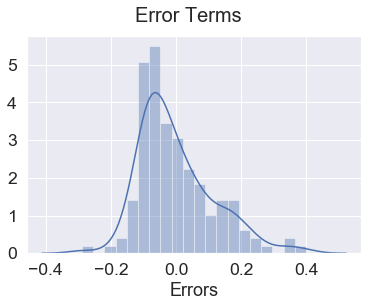

In [161]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
## Step 8: Making Predictions Using the Final Model

#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [163]:
num_vars = ['bmw', 'buick', 'porsche', 'ohcv', 'audi','jaguar']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [164]:
df_test.describe()

,bmw,front,buick,rear,8cyl,convertible,3cyl,porsche,ohcv,audi,enginesize,4cyl,rotor,jaguar,dodge,price,curbweight,carwidth,carheight,horsepower
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,6.200000e+01,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,-5.022312,0.967742,-4.225806,0.032258,0.032258,0.032258,0.0,-0.577179,-0.229945,-0.199866,131.403226,0.854839,0.0,-1.413929e-01,0.048387,13784.967742,2592.596774,66.064516,54.124194,107.725806
std,0.014844,0.178127,0.019145,0.178127,0.178127,0.178127,0.0,0.000069,0.000935,0.000742,43.147273,0.355139,0.0,1.399108e-16,0.216335,8436.653035,462.719100,1.985282,2.438670,39.210307
min,-5.025000,0.000000,-4.230088,0.000000,0.000000,0.000000,0.0,-0.577192,-0.230189,-0.200000,79.000000,0.000000,0.0,-1.413929e-01,0.000000,5399.000000,1819.000000,62.500000,49.400000,52.000000
25%,-5.025000,1.000000,-4.230088,0.000000,0.000000,0.000000,0.0,-0.577192,-0.230189,-0.200000,108.000000,1.000000,0.0,-1.413929e-01,0.000000,8460.500000,2275.000000,64.600000,52.150000,73.750000
50%,-5.025000,1.000000,-4.230088,0.000000,0.000000,0.000000,0.0,-0.577192,-0.230189,-0.200000,121.000000,1.000000,0.0,-1.413929e-01,0.000000,10873.000000,2535.000000,65.600000,54.450000,100.500000
75%,-5.025000,1.000000,-4.230088,0.000000,0.000000,0.000000,0.0,-0.577192,-0.230189,-0.200000,144.750000,1.000000,0.0,-1.413929e-01,0.000000,16601.250000,2944.250000,66.500000,55.700000,119.000000
max,-4.941667,1.000000,-4.141593,1.000000,1.000000,1.000000,0.0,-0.576804,-0.226415,-0.195833,308.000000,1.000000,0.0,-1.413929e-01,1.000000,45400.000000,3900.000000,72.000000,59.800000,207.000000


In [165]:
y_test = df_test.pop('price')
X_test = df_test

In [188]:
#X_test_m4 = X_test_m4.drop(['front','rear','8cyl','convertible','3cyl','enginesize','rotor','dodge','curbweight','carwidth','carheight','horsepower'], axis = 1)

list(X_test_m4)

['bmw', 'buick', 'porsche', 'ohcv', 'audi', '4cyl', 'jaguar']

In [191]:
# Adding constant variable to test dataframe
#X_test_new = X_test[X_test]
X_test_m4 = sm.add_constant(X_test_m4)

In [172]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4 = X_test_m4.drop(['front','rear','8cyl','convertible','3cyl','enginesize','rotor','dodge','curbweight','carwidth','carheight','horsepower'], axis = 1)

In [185]:
list(X_test_new)


NameError: name 'X_test_new' is not defined

In [197]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

Text(0,0.5,'y_pred')

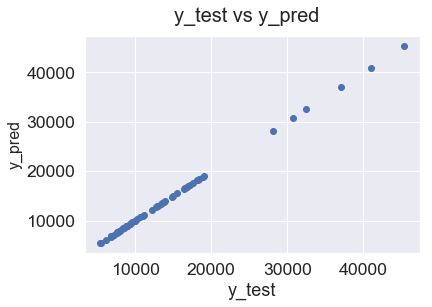

In [199]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [ ]:
We can see that the equation of our best fitted line is:

$ price = 0.4621  \times  bmw + 0.5012  \times  buick + 0.5249 \times porsche + 0.1821 \times ohcv + 0.2287 \times audi + 0.0876 \times hotwaterheating + 0.6147 \times jaguar 
